In [20]:
import pandas as pd

# dust.xlsx 가져오기

dust = pd.read_excel("../resources/8장/dust.xlsx")
dust.head()

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [21]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [22]:
dust.describe()

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,725.000000,739.000000
mean,0.003654,0.563243,0.014154,0.030422,33.325517,21.833559
std,0.000628,0.164593,0.010689,0.014664,19.930029,12.222892
min,0.002000,0.300000,0.001000,0.006000,3.000000,3.000000
25%,0.003000,0.400000,0.003000,0.017000,20.000000,13.000000
50%,0.004000,0.500000,0.014000,0.030000,29.000000,19.000000
75%,0.004000,0.700000,0.024000,0.043000,43.000000,29.000000
max,0.006000,1.200000,0.037000,0.063000,163.000000,72.000000


In [23]:
dust.rename(
    columns={
        "날짜": "date",
        "아황산가스": "so2",
        "일산화탄소": "co",
        "오존": "o3",
        "이산화질소": "no2",
    },
    inplace=True,
)

dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [24]:
dust["date"] = dust["date"].str[:11]
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0


In [25]:
dust["date"] = pd.to_datetime(dust["date"])
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    744 non-null    datetime64[ns]
 1   so2     740 non-null    float64       
 2   co      740 non-null    float64       
 3   o3      740 non-null    float64       
 4   no2     740 non-null    float64       
 5   PM10    725 non-null    float64       
 6   PM2.5   739 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 40.8 KB


In [26]:
dust["year"] = dust["date"].dt.year
dust["month"] = dust["date"].dt.month
dust["day"] = dust["date"].dt.day
dust.columns

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

In [27]:
dust = dust[["date", "year", "month", "day", "so2", "co", "o3", "no2", "PM10", "PM2.5"]]
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,NaN,14.0


In [28]:
dust.isnull().sum()

date      0
year      0
month     0
day       0
so2       4
co        4
o3        4
no2       4
PM10     19
PM2.5     5
dtype: int64

In [29]:
# 결측치 이전 데이터로 채우기
dust = dust.fillna(method='pad')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15868\806710454.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust = dust.fillna(method='pad')


In [30]:
# 결측 데이터 이전 값이 없는 경우 채우기
dust.fillna(20, inplace=True)
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [31]:
dust.isnull().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

In [32]:
import pandas as pd

# weather.xlsx 가져오기

weather = pd.read_excel("../resources/8장/weather.xlsx")
weather.head()

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [33]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       743 non-null    int64         
 1   지점명      743 non-null    object        
 2   일시       743 non-null    datetime64[ns]
 3   기온(°C)   743 non-null    float64       
 4   풍속(m/s)  743 non-null    float64       
 5   강수량(mm)  743 non-null    float64       
 6   습도(%)    743 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.8+ KB


In [34]:
weather.drop(labels='지점', axis=1, inplace=True)
weather.drop(labels='지점명', axis=1, inplace=True)
weather.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [35]:
weather.columns = ["date", "temp", "wind", "rain", "humid"]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


In [42]:
weather["date"] = pd.to_datetime(weather["date"]).dt.date
weather["date"] = weather["date"].astype("datetime64[ns]")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


In [44]:
# 기상청 0.1 단위로 강수량 측정
# 강수량 < 0.1 -> 0 ==> 0, 0.01, 0.5 => 0.01
# 비가 조금 오면 => 0.005, 0.0008 => 0.01
weather["rain"] = weather["rain"].replace([0], 0.01)
weather['rain'].value_counts()

rain
0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: count, dtype: int64

In [46]:
dust.shape

(744, 10)

In [47]:
weather.shape

(743, 5)

In [48]:
dust.drop(index=743, inplace=True)

In [50]:
df = pd.merge(dust, weather, on='date')
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.2,0.6,0.01,57.5
1,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-7.6,0.7,0.01,57.5
2,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.2,0.6,0.01,62.0
3,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.1,0.5,0.01,60.5
4,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0,-8.7,1.3,0.01,66.4


In [52]:
corr = df.corr()
corr

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036,0.491312,-0.074944,0.026688,0.176721
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,-0.318239,0.226099,-0.118081,0.206333,0.016124,0.051036,0.491312,-0.074944,0.026688,0.176721
so2,-0.318239,NaN,NaN,-0.318239,1.000000,0.141117,-0.068687,0.085989,0.160874,0.147571,-0.375131,0.031460,-0.019907,-0.096445
co,0.226099,NaN,NaN,0.226099,0.141117,1.000000,-0.756706,0.841594,0.529720,0.692664,0.318052,-0.322431,0.077531,0.338083
o3,-0.118081,NaN,NaN,-0.118081,-0.068687,-0.756706,1.000000,-0.924362,-0.348229,-0.525078,-0.203804,0.355105,-0.096761,-0.288327
no2,0.206333,NaN,NaN,0.206333,0.085989,0.841594,-0.924362,1.000000,0.420554,0.566387,0.313188,-0.403745,0.109930,0.315524
PM10,0.016124,NaN,NaN,0.016124,0.160874,0.529720,-0.348229,0.420554,1.000000,0.825433,0.175430,-0.108474,0.026272,0.216753
PM2.5,0.051036,NaN,NaN,0.051036,0.147571,0.692664,-0.525078,0.566387,0.825433,1.000000,0.190698,-0.202018,0.069123,0.354713


In [54]:
corr['PM10'].sort_values(ascending=False)

PM10     1.000000
PM2.5    0.825433
co       0.529720
no2      0.420554
humid    0.216753
temp     0.175430
so2      0.160874
rain     0.026272
date     0.016124
day      0.016124
wind    -0.108474
o3      -0.348229
year          NaN
month         NaN
Name: PM10, dtype: float64

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'o3'}>, <Axes: title={'center': 'no2'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humid'}>, <Axes: >, <Axes: >]],
      dtype=object)

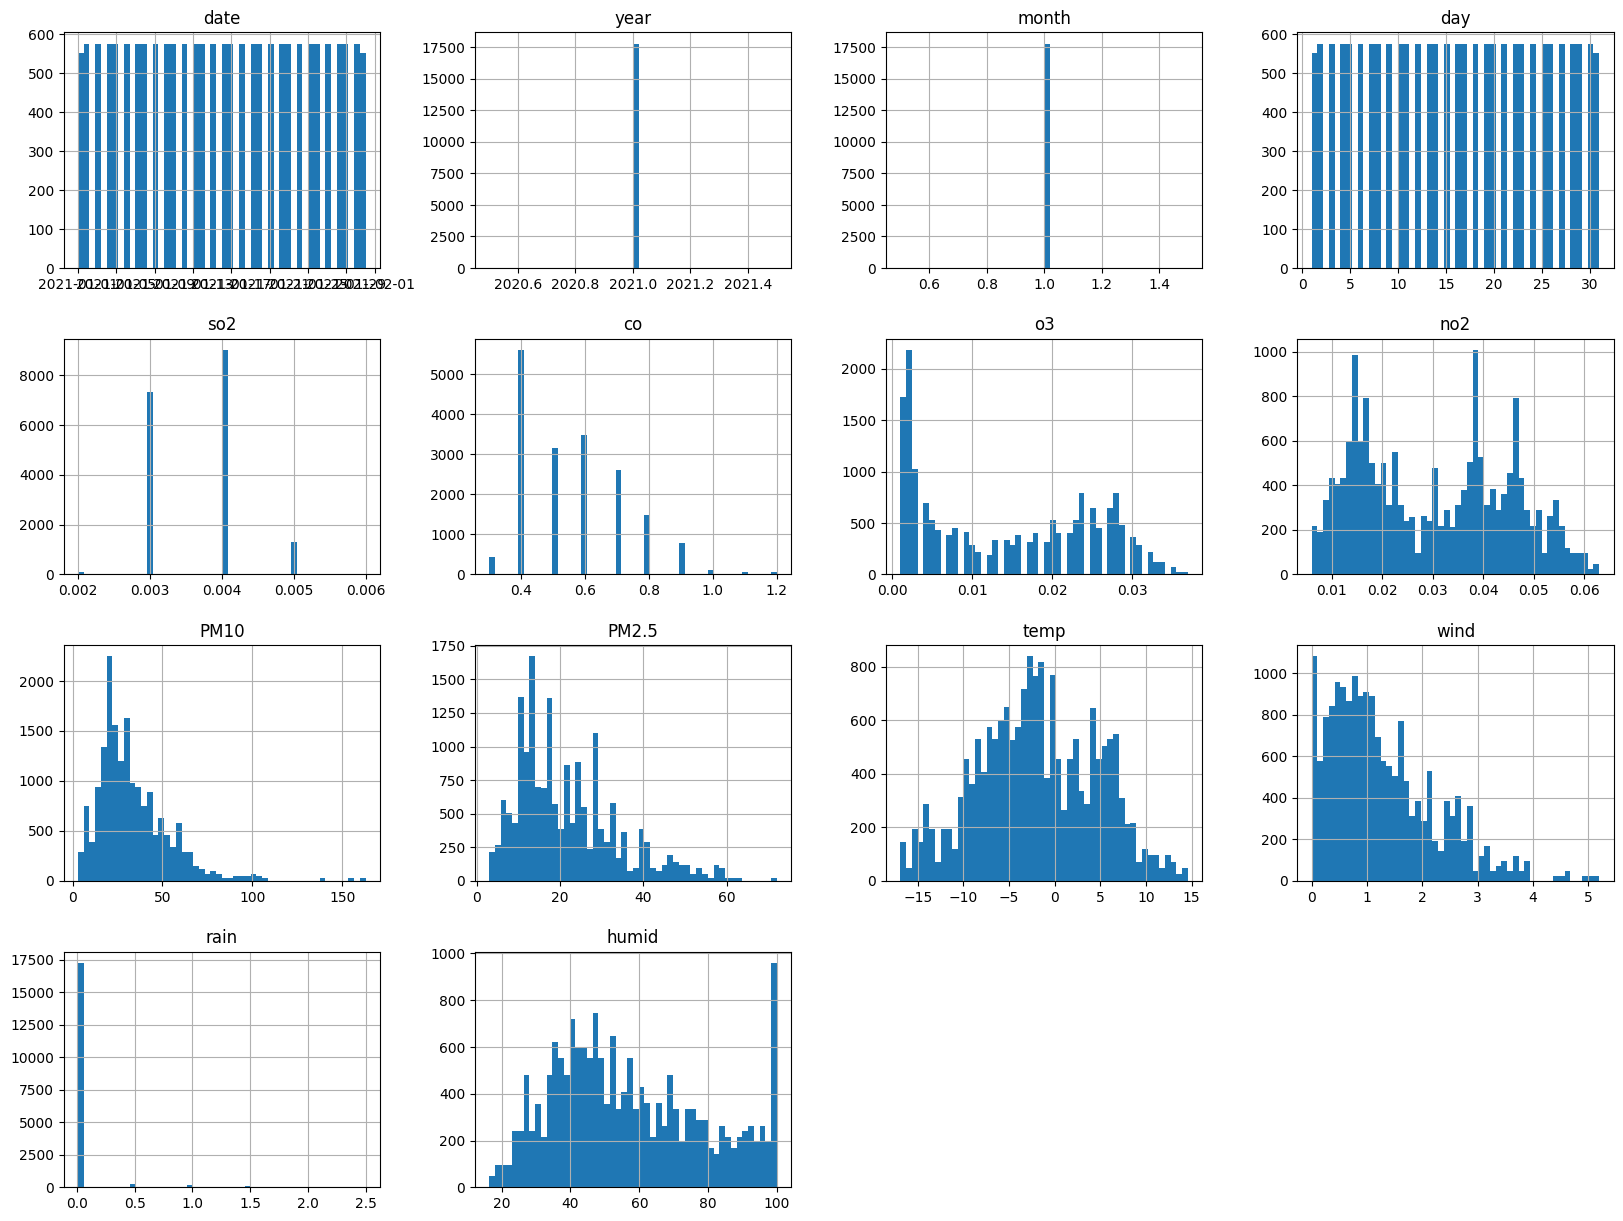

In [55]:
df.hist(bins=50, figsize=(20,15))

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15868\2214181286.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dayGraph = sns.barplot(x="day", y="PM10", data=df, palette="Set1")


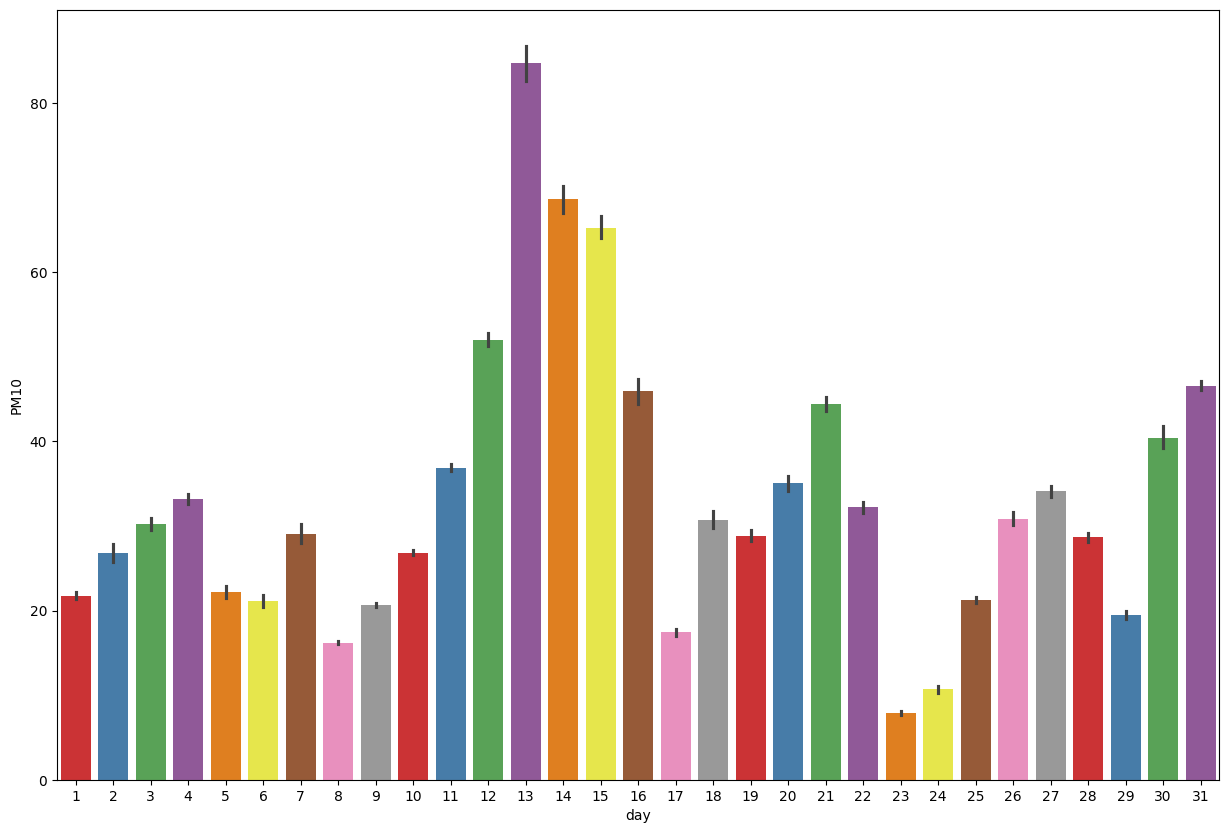

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
dayGraph = sns.barplot(x="day", y="PM10", data=df, palette="Set1")
plt.xticks(rotation=0)
plt.show()

<Axes: >

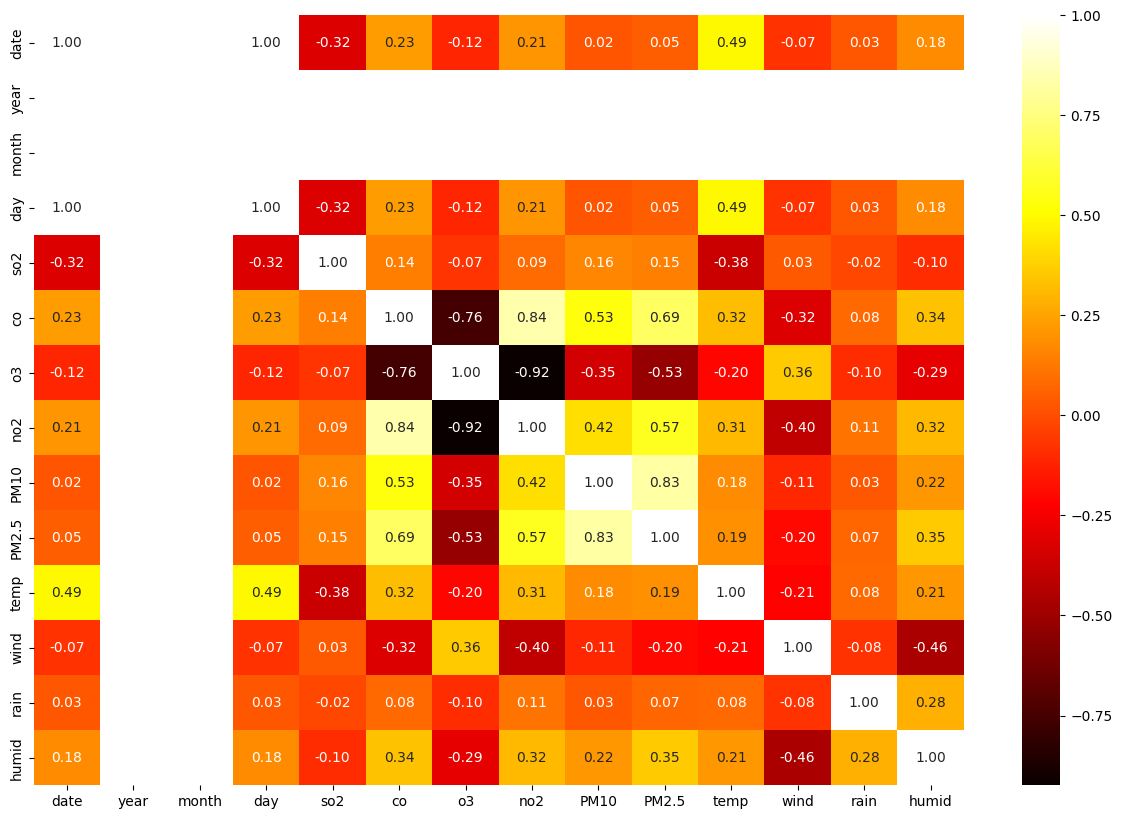

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr, annot=True, fmt='.2f', cmap='hot')

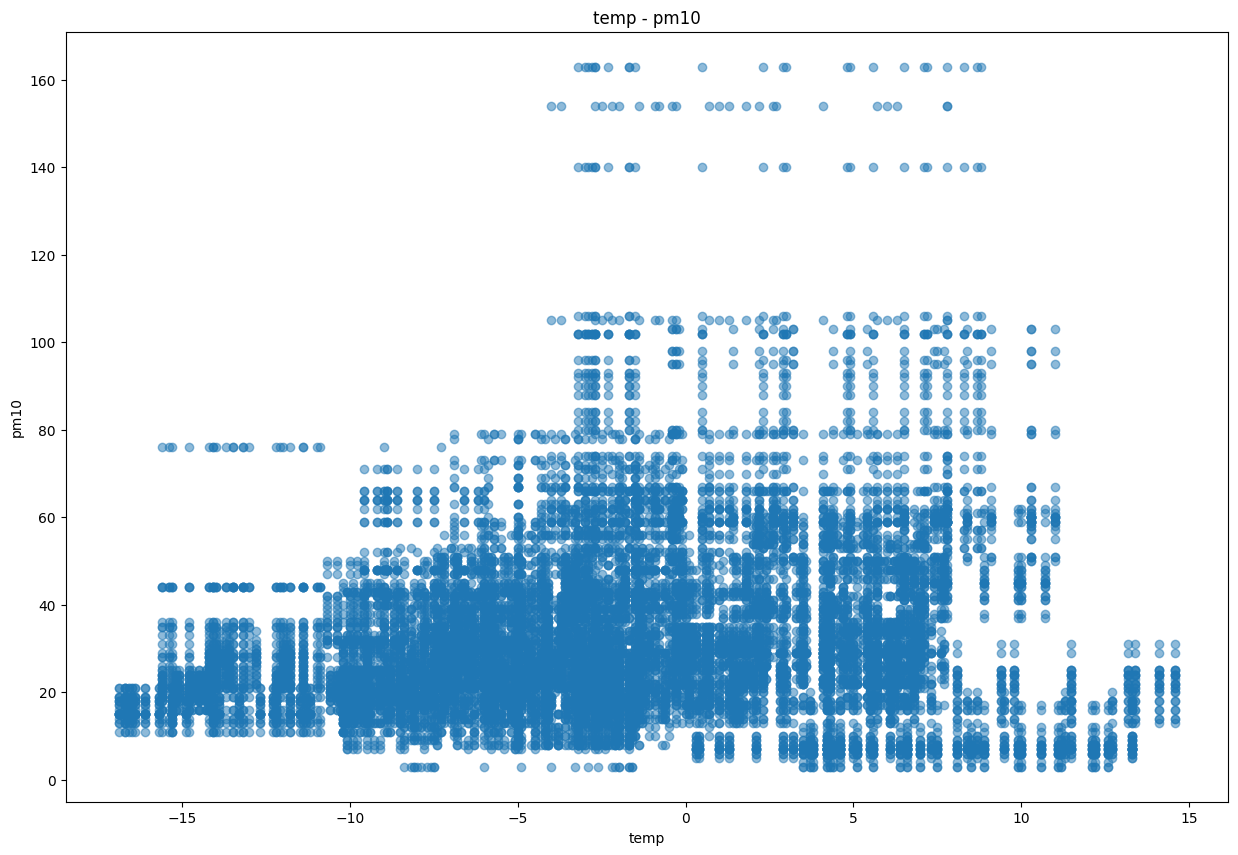

In [61]:
plt.figure(figsize=(15, 10))
x = df["temp"]  # 온도
y = df["PM10"]  # 미세먼지

plt.plot(x, y, marker="o", linestyle="none", alpha=0.5)
plt.title('temp - pm10')
plt.xlabel('temp')
plt.ylabel('pm10')  
plt.show()

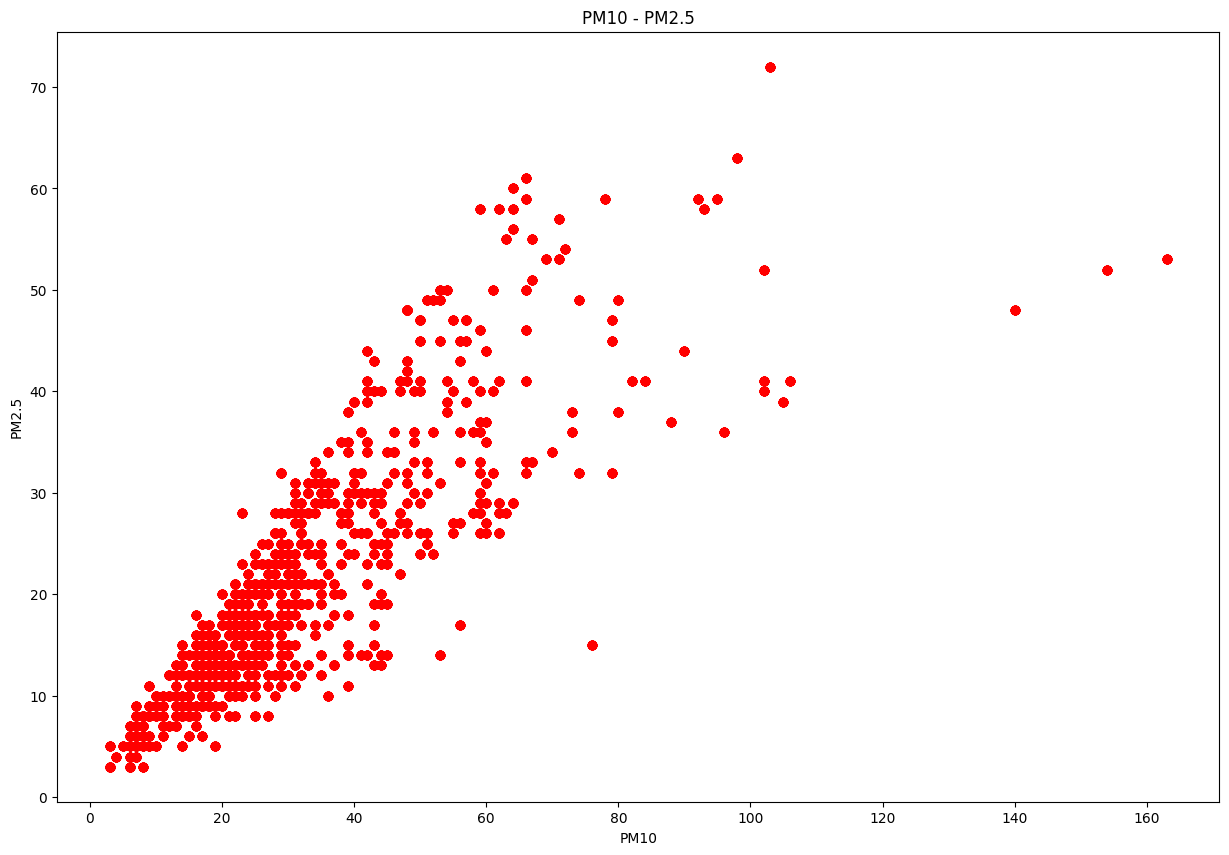

In [64]:
plt.figure(figsize=(15, 10))
x = df["PM10"]  # 미세먼지
y = df["PM2.5"]  # 초미세먼지

plt.plot(x, y, marker="o", linestyle="none", color="red", alpha=0.5)
plt.title("PM10 - PM2.5")
plt.xlabel("PM10")
plt.ylabel("PM2.5")
plt.show()